In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix
from sklearn.utils import resample

In [3]:
df_cases = pd.read_csv('cases.csv')
df_cases = df_cases.rename(columns={'Unnamed: 0': 'patient_id'})

In [4]:
print('Num cases:', len(df_cases))

Num cases: 5267


In [5]:
df_cases

,patient_id,subject_num,birth_date,table1_narrow_count,table1_narrow_start,table1_narrow_start_age,table1_broad_count,table1_broad_start,table1_broad_start_age,table1_hybrid_count,...,table2_count,table2_start,table2_start_age,table3_count,table3_start,table1_count,table1_start,table1_start_age,index_date,index_age
0,184,10159284,1986-04-26,1,2007-05-12,21.1,2,2007-05-12,21.1,2,...,0,NaN,NaN,1,2007-05-12,2,2007-05-12,21.1,2007-05-12,21.1
1,207,11479020,1987-08-31,6,2008-10-12,21.1,8,2006-02-06,18.4,7,...,0,NaN,NaN,0,NaN,8,2006-02-06,18.4,2006-02-06,18.4
2,239,12160476,1987-08-20,15,2019-12-09,32.3,15,2019-12-09,32.3,15,...,0,NaN,NaN,0,NaN,15,2019-12-09,32.3,2019-12-09,32.3
3,337,12061753,1986-05-10,9,2014-08-31,28.3,9,2014-08-31,28.3,9,...,0,NaN,NaN,5,2014-08-31,9,2014-08-31,28.3,2014-08-31,28.3
4,436,12752558,2001-08-14,24,2020-02-28,18.6,24,2020-02-28,18.6,24,...,0,NaN,NaN,0,NaN,24,2020-02-28,18.6,2020-02-28,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,1328341,12419659,1992-09-28,3,2019-02-21,26.4,3,2019-02-21,26.4,3,...,0,NaN,NaN,0,NaN,3,2019-02-21,26.4,2019-02-21,26.4
5263,1328521,10428995,2002-09-02,2,2020-05-17,17.7,10,2020-04-30,17.7,10,...,0,NaN,NaN,0,NaN,10,2020-04-30,17.7,2020-04-30,17.7
5264,1328731,12456174,1993-06-11,2,2018-10-23,25.4,2,2018-10-23,25.4,2,...,0,NaN,NaN,0,NaN,2,2018-10-23,25.4,2018-10-23,25.4
5265,1329127,11048025,2003-02-23,2,2019-01-19,15.9,2,2019-01-19,15.9,2,...,0,NaN,NaN,0,NaN,2,2019-01-19,15.9,2019-01-19,15.9


In [6]:
df_race = pd.read_csv('./No_Race_Data/demographics.csv')
df_race

,subject_num,gender,sbirth_date,race,veteran,marital_status,ethnicity,deceased,sdeath_date,biobank_genotyped,current_zip3,currentzip_medianincome_2010,visit_count,fact_count,icd_count,icd_first_sdate,cpt_count,cpt_first_sdate,public_payer,notes_ct
0,10985687,M,1969-06-16,Black,U,Married,Non-Hispanic,N,NaN,NaN,020,69340.0,49.0,547.0,231.0,05/03/1998,261.0,05/03/1998,0,94.0
1,11664128,F,1966-10-02,White,U,Single,Non-Hispanic,Y,09/20/2008,NaN,020,85131.0,91.0,710.0,391.0,09/08/1999,312.0,09/08/1999,1,145.0
2,12095563,F,1970-08-10,Unknown,N,Single,Hispanic,N,NaN,NaN,021,30282.0,304.0,1615.0,693.0,01/17/1998,745.0,01/17/1998,1,353.0
3,12021239,M,1968-02-22,Black,N,Single,Non-Hispanic,N,NaN,NaN,019,38107.0,18.0,225.0,99.0,07/27/1998,117.0,07/27/1998,1,37.0
4,10341333,F,1968-01-18,White,N,Married,Non-Hispanic,N,NaN,NaN,023,62408.0,392.0,2024.0,1056.0,01/08/1998,762.0,01/08/1998,0,364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329191,12470877,M,1986-06-08,Asian,N,Married,Non-Hispanic,N,NaN,NaN,024,128598.0,57.0,197.0,121.0,02/14/2017,48.0,10/01/2017,0,37.0
1329192,11706242,M,2001-08-05,Black,U,Single,Non-Hispanic,N,NaN,NaN,021,62945.0,10.0,31.0,20.0,08/13/2015,6.0,01/21/2016,1,15.0
1329193,11181783,F,1996-12-13,White,N,Single,Non-Hispanic,N,NaN,NaN,020,164583.0,27.0,106.0,35.0,04/14/2001,40.0,04/14/2001,0,8.0
1329194,12796490,M,1966-04-14,Black,N,Divorced,Non-Hispanic,N,NaN,NaN,021,40344.0,8.0,118.0,36.0,08/09/2015,44.0,08/09/2015,1,26.0


# No Race Model Results

In [7]:
# df_no_race_15 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_15.csv')
# df_no_race_15 = df_no_race_15.rename(columns={'Unnamed: 0': 'patient_id'})

# df_no_race_20 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_20.csv')
# df_no_race_20 = df_no_race_20.rename(columns={'Unnamed: 0': 'patient_id'})

# df_no_race_25 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_25.csv')
# df_no_race_25 = df_no_race_25.rename(columns={'Unnamed: 0': 'patient_id'})

# df_no_race_30 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_30.csv')
# df_no_race_30 = df_no_race_30.rename(columns={'Unnamed: 0': 'patient_id'})

In [8]:
# df_no_race_all_ages = pd.concat([df_no_race_15, df_no_race_20, df_no_race_25, df_no_race_30], ignore_index=True)

In [9]:
# df_no_race_all_ages

In [10]:
# # add a column on race
# all_races = []
# for _, row in df_no_race_all_ages.iterrows():
#     race = list(df_race[df_race['subject_num']==row['subject_num']]['race'])[0]
#     all_races.append(race)

# df_no_race_all_ages['race'] = all_races

In [11]:
# df_no_race_all_ages.to_csv('df_no_race_all_ages.csv')

In [12]:
df_no_race_all_ages = pd.read_csv('df_no_race_all_ages.csv')

In [17]:
df_no_race_all_ages = df_no_race_all_ages[df_no_race_all_ages.duplicated('patient_id', keep=False) == False]

In [18]:
df_no_race_all_ages

,Unnamed: 0,patient_id,subject_num,index_date,isCase,birth_date,age_at_index,0,1,race
0,0,556,10000131,2017-10-30,1,1994-01-12,23.8,1.000000,0.000000,Black
1,1,380749,10000163,2020-10-19,0,1991-01-06,29.8,1.000000,0.000000,White
2,2,189070,10000287,2020-07-25,0,1996-07-07,24.1,0.994141,0.005859,Asian
3,3,573942,10000828,2020-09-12,0,1993-06-26,27.2,1.000000,0.000000,White
4,4,541806,10001053,2020-12-05,0,1996-09-26,24.2,0.996094,0.003906,Other
...,...,...,...,...,...,...,...,...,...,...
91586,91586,367756,12930519,2020-09-12,0,1971-11-07,48.9,1.000000,0.000000,White
91587,91587,388818,12930584,2020-11-18,0,1973-03-21,47.7,1.000000,0.000000,White
91588,91588,215847,12930744,2020-10-06,0,1976-12-22,43.8,0.998047,0.001953,Black
91589,91589,466239,12931116,2020-06-28,0,1970-01-21,50.5,0.998047,0.001953,White


In [25]:
len(df_no_race_all_ages[df_no_race_all_ages['race']=='Unknown'])

5816

# No Race Model: 16 AUC Scores (By Race and Age)

In [6]:
# df_no_race_15 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_15.csv')
# df_no_race_15 = df_no_race_15.rename(columns={'Unnamed: 0': 'patient_id'})

# df_no_race_20 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_20.csv')
# df_no_race_20 = df_no_race_20.rename(columns={'Unnamed: 0': 'patient_id'})

# df_no_race_25 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_25.csv')
# df_no_race_25 = df_no_race_25.rename(columns={'Unnamed: 0': 'patient_id'})

# df_no_race_30 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_30.csv')
# df_no_race_30 = df_no_race_30.rename(columns={'Unnamed: 0': 'patient_id'})

In [10]:
# # add a column on race
# all_races = []
# for _, row in df_no_race_30.iterrows():
#     race = list(df_race[df_race['subject_num']==row['subject_num']]['race'])[0]
#     all_races.append(race)

# df_no_race_30['race'] = all_races
# df_no_race_30.to_csv('./No_Race_Data/rf_model_pred_res_age_30_with_race.csv')

In [178]:
df_race_15 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_15_with_race.csv')
df_race_20 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_20_with_race.csv')
df_race_25 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_25_with_race.csv')
df_race_30 = pd.read_csv('./No_Race_Data/rf_model_pred_res_age_30_with_race.csv')

In [60]:
df_race_15.iloc[:10]['1']

0    0.000000
1    0.000000
2    0.005859
3    0.000000
4    0.003906
5    0.000000
6    0.015625
7    0.000000
8    0.000000
9    0.013672
Name: 1, dtype: float64

In [48]:
df_race[df_race['subject_num']==10000163]

,subject_num,gender,sbirth_date,race,veteran,marital_status,ethnicity,deceased,sdeath_date,biobank_genotyped,current_zip3,currentzip_medianincome_2010,visit_count,fact_count,icd_count,icd_first_sdate,cpt_count,cpt_first_sdate,public_payer,notes_ct
769711,10000163,F,1991-01-06,White,N,Single,Non-Hispanic,N,NaN,NaN,021,55890.0,23.0,82.0,38.0,11/14/2004,39.0,11/14/2004,0,18.0


In [116]:
def auc_per_race_for_age(df_race_by_age, lower_age):
    race_list = ['White', 'Black', 'Asian', 'Other', 'Unknown']
    
    for race in race_list:
        df_by_race = df_race_by_age[df_race_by_age['race']==race]
        y = df_by_race['isCase'] # ground truth
        scores = df_by_race['1']

        # # get prob score for each ground truth y
        # for _, row in df_by_race.iterrows():
        #     isCase = row['isCase'] # 0 or 1
        #     scores.append(row[isCase]) # prob score for that ground truth
        
        auc_race = roc_auc_score(y, scores)
        
#         # Bootstrapping to calculate confidence intervals
#         n_bootstraps = 10000
#         rng = np.random.default_rng(seed=42)  # Reproducibility
#         bootstrapped_aucs = []

#         for _ in range(n_bootstraps):
#             # Sample with replacement
#             indices = rng.integers(0, len(y), len(y))
#             if len(np.unique(y.iloc[indices])) < 2:
#                 # Skip if resampled data doesn't have both classes
#                 continue
#             auc_bootstrap = roc_auc_score(y.iloc[indices], scores.iloc[indices])
#             bootstrapped_aucs.append(auc_bootstrap)

#         # Calculate 95% confidence interval
#         lower = np.percentile(bootstrapped_aucs, 2.5)
#         upper = np.percentile(bootstrapped_aucs, 97.5)
        
        # threshold = 0.04
        threshold = 0.02
        y_pred = (scores >= threshold).astype(int)

        # Confusion matrix: [[TN, FP], [FN, TP]]
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

        # Sensitivity (Recall)
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Specificity
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        # Positive Predictive Value (PPV, Precision)
        ppv = tp / (tp + fp) if (tp + fp) > 0 else 0

        # Negative Predictive Value (NPV)
        npv = tn / (tn + fn) if (tn + fn) > 0 else 0

        # Print the results
        print(f'TP {race} ({lower_age}-{lower_age+5}): ', tp)
        print(f'FP {race} ({lower_age}-{lower_age+5}): ', fp)
        print(f'TN {race} ({lower_age}-{lower_age+5}): ', tn)
        print(f'FN {race} ({lower_age}-{lower_age+5}): ', fn)
        print()
        
        print(f"Specificity {race} ({lower_age}-{lower_age+5}): {specificity:.2f}")
        print(f"Sensitivity {race} ({lower_age}-{lower_age+5}): {sensitivity:.2f}")
        print(f"PPV {race} ({lower_age}-{lower_age+5}): {ppv:.2f}")
        print(f"NPV {race} ({lower_age}-{lower_age+5}): {npv:.2f}")
        
        # print(f'AUC {race} ({lower_age}-{lower_age+5}): ', round(auc_race, 2), (lower, upper))
        print(f'AUC {race} ({lower_age}-{lower_age+5}): ', round(auc_race, 2))
        print()

In [104]:
test_y = df_race_30['isCase'] # ground truth
test_scores = df_race_30['1'] # probability scores of each element being positive (0 to 1)

threshold = 0.06
y_pred = (test_scores >= threshold).astype(int)

tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()

sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0


print(f"Specificity: {specificity:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"PPV: {ppv:.2f}")
print(f"NPV: {npv:.2f}")

Specificity: 0.99
Sensitivity: 0.21
PPV: 0.14
NPV: 0.99


In [108]:
auc_per_race_for_age(df_race_15, 15)
print()
auc_per_race_for_age(df_race_20, 20)
print()
auc_per_race_for_age(df_race_25, 25)
print()
auc_per_race_for_age(df_race_30, 30)

TP White (15-20):  22
FP White (15-20):  94
TN White (15-20):  9560
FN White (15-20):  181

Specificity White (15-20): 0.99
Sensitivity White (15-20): 0.11
PPV White (15-20): 0.19
NPV White (15-20): 0.98
AUC White (15-20):  0.61

TP Black (15-20):  3
FP Black (15-20):  12
TN Black (15-20):  1096
FN Black (15-20):  45

Specificity Black (15-20): 0.99
Sensitivity Black (15-20): 0.06
PPV Black (15-20): 0.20
NPV Black (15-20): 0.96
AUC Black (15-20):  0.57

TP Asian (15-20):  2
FP Asian (15-20):  5
TN Asian (15-20):  493
FN Asian (15-20):  16

Specificity Asian (15-20): 0.99
Sensitivity Asian (15-20): 0.11
PPV Asian (15-20): 0.29
NPV Asian (15-20): 0.97
AUC Asian (15-20):  0.62

TP Other (15-20):  7
FP Other (15-20):  22
TN Other (15-20):  1496
FN Other (15-20):  29

Specificity Other (15-20): 0.99
Sensitivity Other (15-20): 0.19
PPV Other (15-20): 0.24
NPV Other (15-20): 0.98
AUC Other (15-20):  0.67

TP Unknown (15-20):  5
FP Unknown (15-20):  27
TN Unknown (15-20):  1264
FN Unknown (15-

# With Race Model: 16 AUC Scores

In [37]:
# df_with_race_15 = pd.read_csv('rf_model_pred_res_age_15.csv')
# df_with_race_15 = df_with_race_15.rename(columns={'Unnamed: 0': 'patient_id'})

# df_with_race_20 = pd.read_csv('rf_model_pred_res_age_20.csv')
# df_with_race_20 = df_with_race_20.rename(columns={'Unnamed: 0': 'patient_id'})

# df_with_race_25 = pd.read_csv('rf_model_pred_res_age_25.csv')
# df_with_race_25 = df_with_race_25.rename(columns={'Unnamed: 0': 'patient_id'})

# df_with_race_30 = pd.read_csv('rf_model_pred_res_age_30.csv')
# df_with_race_30 = df_with_race_30.rename(columns={'Unnamed: 0': 'patient_id'})

In [41]:
# # add a column on race
# all_races = []
# for _, row in df_with_race_30.iterrows():
#     race = list(df_race[df_race['subject_num']==row['subject_num']]['race'])[0]
#     all_races.append(race)

# df_with_race_30['race'] = all_races
# df_with_race_30.to_csv('rf_model_pred_res_age_30_with_race.csv')

In [109]:
df_race_15_with = pd.read_csv('rf_model_pred_res_age_15_with_race.csv')
df_race_20_with = pd.read_csv('rf_model_pred_res_age_20_with_race.csv')
df_race_25_with = pd.read_csv('rf_model_pred_res_age_25_with_race.csv')
df_race_30_with = pd.read_csv('rf_model_pred_res_age_30_with_race.csv')

In [122]:
def auc_per_race_for_age_debug(df_race_by_age, lower_age, race_list, threshold):
    # race_list = ['White', 'Black', 'Asian', 'Other', 'Unknown']
    
    for race in race_list:
        df_by_race = df_race_by_age[df_race_by_age['race']==race]
        y = df_by_race['isCase'] # ground truth
        scores = df_by_race['1']

        # # get prob score for each ground truth y
        # for _, row in df_by_race.iterrows():
        #     isCase = row['isCase'] # 0 or 1
        #     scores.append(row[isCase]) # prob score for that ground truth
        
        auc_race = roc_auc_score(y, scores)
        
        # threshold = 0.04
        y_pred = (scores >= threshold).astype(int)

        # Confusion matrix: [[TN, FP], [FN, TP]]
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

        # Sensitivity (Recall)
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Specificity
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        # Positive Predictive Value (PPV, Precision)
        ppv = tp / (tp + fp) if (tp + fp) > 0 else 0

        # Negative Predictive Value (NPV)
        npv = tn / (tn + fn) if (tn + fn) > 0 else 0

        # Print the results
        print(f'TP {race} ({lower_age}-{lower_age+5}): ', tp)
        print(f'FP {race} ({lower_age}-{lower_age+5}): ', fp)
        print(f'TN {race} ({lower_age}-{lower_age+5}): ', tn)
        print(f'FN {race} ({lower_age}-{lower_age+5}): ', fn)
        print()
        
        print(f"Specificity {race} ({lower_age}-{lower_age+5}): {specificity:.2f}")
        print(f"Sensitivity {race} ({lower_age}-{lower_age+5}): {sensitivity:.2f}")
        print(f"PPV {race} ({lower_age}-{lower_age+5}): {ppv:.2f}")
        print(f"NPV {race} ({lower_age}-{lower_age+5}): {npv:.2f}")
        
        # print(f'AUC {race} ({lower_age}-{lower_age+5}): ', round(auc_race, 2), (lower, upper))
        print(f'AUC {race} ({lower_age}-{lower_age+5}): ', round(auc_race, 2))
        print()

In [146]:
auc_per_race_for_age_debug(df_race_20_with, 20, ['Other', 'Unknown'], 0.03)

TP Other (20-25):  10
FP Other (20-25):  69
TN Other (20-25):  1881
FN Other (20-25):  38

Specificity Other (20-25): 0.96
Sensitivity Other (20-25): 0.21
PPV Other (20-25): 0.13
NPV Other (20-25): 0.98
AUC Other (20-25):  0.66

TP Unknown (20-25):  4
FP Unknown (20-25):  51
TN Unknown (20-25):  1649
FN Unknown (20-25):  33

Specificity Unknown (20-25): 0.97
Sensitivity Unknown (20-25): 0.11
PPV Unknown (20-25): 0.07
NPV Unknown (20-25): 0.98
AUC Unknown (20-25):  0.6



In [160]:
def get_age_bucket_df_per_race(model_df, age_threshold):
    '''
    model_pred_csv: df of model prediction for only one age group and one race
    age_threshold: i.e. for 15-20 it would be 15; for 20-25 it would be 20, etc.
    '''
    # rf_preds = model_df
    # rf_preds = rf_preds.rename(columns={'Unnamed: 0': 'patient_id'})
    # rf_preds = rf_preds.rename(columns={rf_preds.columns[0]: "patient_id"})

    # csv of just controls
    rf_controls = model_df[model_df['isCase'] == 0]
    
    # csv of just cases
    rf_cases = model_df[model_df['isCase'] == 1]
    rf_cases = rf_cases.sort_values(by='1', ascending=False)
    
    df_within_1_year = rf_cases[(rf_cases['age_at_index']-age_threshold > 0) & (rf_cases['age_at_index']-age_threshold < 1)]
    df_1_to_2_years = rf_cases[(rf_cases['age_at_index']-age_threshold >= 1) & (rf_cases['age_at_index']-age_threshold < 2)]
    df_2_to_3_years = rf_cases[(rf_cases['age_at_index']-age_threshold >= 2) & (rf_cases['age_at_index']-age_threshold < 3)]
    df_3_to_4_years = rf_cases[(rf_cases['age_at_index']-age_threshold >= 3) & (rf_cases['age_at_index']-age_threshold < 4)]
    df_4_to_5_years = rf_cases[(rf_cases['age_at_index']-age_threshold >= 4) & (rf_cases['age_at_index']-age_threshold < 5)]
    
    print('Within 1 year: ', len(df_within_1_year))
    print('1 to 2 years: ', len(df_1_to_2_years))
    print('2 to 3 years: ', len(df_2_to_3_years))
    print('3 to 4 years: ', len(df_3_to_4_years))
    print('4 to 5 years: ', len(df_4_to_5_years))

    total_cases = len(df_within_1_year)+len(df_1_to_2_years)+len(df_2_to_3_years)+len(df_3_to_4_years)+len(df_4_to_5_years)
    total_cases_df = pd.concat([df_within_1_year, df_1_to_2_years, df_2_to_3_years, df_3_to_4_years, df_4_to_5_years], axis=0, join='outer')
    print('Total RF testing cases: ', total_cases)
    
    # add cases that meet case def outside of range to rf_controls
    controls_add_on = rf_cases[rf_cases['patient_id'].apply(lambda x: x not in list(total_cases_df['patient_id']))]
    rf_controls = pd.concat([rf_controls, controls_add_on], axis=0, join='outer')
    rf_controls = rf_controls.sort_values(by='1', ascending=False)
    
    return total_cases_df, rf_controls, total_cases

In [166]:
def get_sensitivity(rf_controls, rf_cases, total_cases):
    # get top 10% of rf_controls and the threshold
    top_10_percent_row_count = int(len(rf_controls) * 0.1)
    top_10_percent_rows = rf_controls.head(top_10_percent_row_count)

    # get top 5% of rf_controls and the threshold
    top_5_percent_row_count = int(len(rf_controls) * 0.05)
    top_5_percent_rows = rf_controls.head(top_5_percent_row_count)
    import pdb

    # get top 1% of rf_controls and the threshold
    top_1_percent_row_count = int(len(rf_controls) * 0.01)
    top_1_percent_rows = rf_controls.head(top_1_percent_row_count)

    # calculate thresholds
    threshold_90 = list(top_10_percent_rows.tail(1)['1'])[0]
    threshold_95 = list(top_5_percent_rows.tail(1)['1'])[0]
    threshold_99 = list(top_1_percent_rows.tail(1)['1'])[0]
    
    # print thresholds
    print('90% threshold: ', threshold_90)
    print('95% threshold: ', threshold_95)
    print('99% threshold: ', threshold_99)
    
    # apply threshold to cases
    specificity_cases_90 = rf_cases[rf_cases['1'] >= threshold_90]
    specificity_cases_95 = rf_cases[rf_cases['1'] >= threshold_95] 
    specificity_cases_99 = rf_cases[rf_cases['1'] >= threshold_99]
    
    # print 2x2 table (true and false pos and negs) for 95%
    print("True positives: ", len(specificity_cases_95))
    print("False positives: ", top_5_percent_row_count)
    print("True negatives: ", len(rf_controls[rf_controls['1'] < threshold_95]))
    print("False negatives: ", len(rf_cases[rf_cases['1'] < threshold_95]))
    print()
    
    # print list of all individuals (cases + controls) that model predicts as cases (SUBJECT_NUM, not PATIENT_ID)
    # list_individuals_pred_as_cases_90 = top_10_percent_rows[top_10_percent_rows['isCase']==1]['subject_num'].tolist() + specificity_cases_90[specificity_cases_90['isCase']==1]['subject_num'].tolist()
    list_individuals_pred_as_cases_95 = list(set(top_5_percent_rows['subject_num'].tolist() + specificity_cases_95['subject_num'].tolist()))
    list_true_positives_95 = specificity_cases_95['subject_num'].tolist()
    # list_individuals_pred_as_cases_99 = top_1_percent_rows[top_1_percent_rows['isCase']==1]['subject_num'].tolist() + specificity_cases_99[specificity_cases_99['isCase']==1]['subject_num'].tolist()
    
    
    # print sensitivities
    print(f"Specificity 90 ({len(specificity_cases_90)}/{total_cases}): ", len(specificity_cases_90)/total_cases)
    print(f"Specificity 95 ({len(specificity_cases_95)}/{total_cases}): ", len(specificity_cases_95)/total_cases)
    print(f"Specificity 99 ({len(specificity_cases_99)}/{total_cases}): ", len(specificity_cases_99)/total_cases)
    
    # return specificity_cases_90, specificity_cases_95, specificity_cases_99

In [185]:
# no race model
race_list = ['White', 'Black', 'Asian', 'Other', 'Unknown']

for race in race_list:
    print(f'Age 15, Race {race}')
    print('---------------------------')
    total_cases_df_white_15, rf_controls_white_15, total_cases_white_15 = get_age_bucket_df_per_race(df_race_15[df_race_15['race']==race], 15)
    get_sensitivity(rf_controls_white_15, total_cases_df_white_15, total_cases_white_15)
    print()

Age 15, Race White
---------------------------
Within 1 year:  13
1 to 2 years:  13
2 to 3 years:  18
3 to 4 years:  15
4 to 5 years:  25
Total RF testing cases:  84
90% threshold:  0.009765625
95% threshold:  0.015625
99% threshold:  0.0390625
True positives:  33
False positives:  488
True negatives:  9211
False negatives:  51

Specificity 90 (43/84):  0.5119047619047619
Specificity 95 (33/84):  0.39285714285714285
Specificity 99 (21/84):  0.25

Age 15, Race Black
---------------------------
Within 1 year:  3
1 to 2 years:  2
2 to 3 years:  7
3 to 4 years:  2
4 to 5 years:  6
Total RF testing cases:  20
90% threshold:  0.013671875
95% threshold:  0.01953125
99% threshold:  0.046875
True positives:  7
False positives:  56
True negatives:  1065
False negatives:  13

Specificity 90 (8/20):  0.4
Specificity 95 (7/20):  0.35
Specificity 99 (3/20):  0.15

Age 15, Race Asian
---------------------------
Within 1 year:  2
1 to 2 years:  1
2 to 3 years:  3
3 to 4 years:  2
4 to 5 years:  2
Tota

In [188]:
# with race model
race_list = ['White', 'Black', 'Asian', 'Other', 'Unknown']

for race in race_list:
    print(f'Age 30, Race {race}')
    print('---------------------------')
    total_cases_df_white_15, rf_controls_white_15, total_cases_white_15 = get_age_bucket_df_per_race(df_race_30_with[df_race_30_with['race']==race], 30)
    get_sensitivity(rf_controls_white_15, total_cases_df_white_15, total_cases_white_15)
    print()

Age 30, Race White
---------------------------
Within 1 year:  35
1 to 2 years:  46
2 to 3 years:  26
3 to 4 years:  37
4 to 5 years:  25
Total RF testing cases:  169
90% threshold:  0.009765625
95% threshold:  0.01953125
99% threshold:  0.06640625
True positives:  90
False positives:  1096
True negatives:  20784
False negatives:  79

Specificity 90 (107/169):  0.6331360946745562
Specificity 95 (90/169):  0.5325443786982249
Specificity 99 (47/169):  0.2781065088757396

Age 30, Race Black
---------------------------
Within 1 year:  5
1 to 2 years:  17
2 to 3 years:  11
3 to 4 years:  6
4 to 5 years:  6
Total RF testing cases:  45
90% threshold:  0.013671875
95% threshold:  0.0234375
99% threshold:  0.0546875
True positives:  17
False positives:  146
True negatives:  2776
False negatives:  28

Specificity 90 (20/45):  0.4444444444444444
Specificity 95 (17/45):  0.37777777777777777
Specificity 99 (5/45):  0.1111111111111111

Age 30, Race Asian
---------------------------
Within 1 year:  1

# Analysis Per Race

In [146]:
def get_sensitivity(rf_controls, rf_cases):
    total_cases = len(rf_cases)
    # get top 10% of rf_controls and the threshold
    top_10_percent_row_count = int(len(rf_controls) * 0.1)
    top_10_percent_rows = rf_controls.head(top_10_percent_row_count)

    # get top 5% of rf_controls and the threshold
    top_5_percent_row_count = int(len(rf_controls) * 0.05)
    top_5_percent_rows = rf_controls.head(top_5_percent_row_count)
    import pdb

    # get top 1% of rf_controls and the threshold
    top_1_percent_row_count = int(len(rf_controls) * 0.01)
    top_1_percent_rows = rf_controls.head(top_1_percent_row_count)

    # calculate thresholds
    threshold_90 = list(top_10_percent_rows.tail(1)['1'])[0]
    threshold_95 = list(top_5_percent_rows.tail(1)['1'])[0]
    threshold_99 = list(top_1_percent_rows.tail(1)['1'])[0]
    
    # print thresholds
    print('90% threshold: ', threshold_90)
    print('95% threshold: ', threshold_95)
    print('99% threshold: ', threshold_99)
    
    # apply threshold to cases
    specificity_cases_90 = rf_cases[rf_cases['1'] >= threshold_90]
    specificity_cases_95 = rf_cases[rf_cases['1'] >= threshold_95] 
    specificity_cases_99 = rf_cases[rf_cases['1'] >= threshold_99]
    
    # print 2x2 table (true and false pos and negs) for 95%
    print("True positives: ", len(specificity_cases_95))
    print("False positives: ", top_5_percent_row_count)
    print("True negatives: ", len(rf_controls[rf_controls['1'] < threshold_95]))
    print("False negatives: ", len(rf_cases[rf_cases['1'] < threshold_95]))
    print()
    
    # print sensitivities
    print(f"Specificity 90 ({len(specificity_cases_90)}/{total_cases}): ", len(specificity_cases_90)/total_cases)
    print(f"Specificity 95 ({len(specificity_cases_95)}/{total_cases}): ", len(specificity_cases_95)/total_cases)
    print(f"Specificity 99 ({len(specificity_cases_99)}/{total_cases}): ", len(specificity_cases_99)/total_cases)
    
    fn_90 = len(rf_cases[rf_cases['1'] < threshold_90])
    fn_95 = len(rf_cases[rf_cases['1'] < threshold_95])
    fn_99 = len(rf_cases[rf_cases['1'] < threshold_99])
    
    fp_90 = top_10_percent_row_count
    fp_95 = top_5_percent_row_count
    fp_99 = top_1_percent_row_count
    
    tn_90 = len(rf_controls[rf_controls['1'] < threshold_90])
    tn_95 = len(rf_controls[rf_controls['1'] < threshold_95])
    tn_99 = len(rf_controls[rf_controls['1'] < threshold_99])
    
    return threshold_90, threshold_95, threshold_99, specificity_cases_90, specificity_cases_95, specificity_cases_99, fn_90, fn_95, fn_99, fp_90, fp_95, fp_99, tn_90, tn_95, tn_99

In [65]:
def get_true_pos_info(race, spec, rf_cases_race):
    cases_model_correctly_pred = spec['patient_id'].tolist()
    print(f'For the {race} race, {len(cases_model_correctly_pred)} out of {len(rf_cases_race)} cases ({round((float(len(cases_model_correctly_pred))/len(rf_cases_race)) * 100, 2)}%) \
    were correctly predicted by the model.')
    
    return len(cases_model_correctly_pred)

In [38]:
rf_controls = df_no_race_all_ages[df_no_race_all_ages['isCase']==0].drop('Unnamed: 0', axis=1)
rf_cases = df_no_race_all_ages[df_no_race_all_ages['isCase']==1].drop('Unnamed: 0', axis=1)

In [39]:
rf_cases

,patient_id,subject_num,index_date,isCase,birth_date,age_at_index,0,1,race
0,556,10000131,2017-10-30,1,1994-01-12,23.8,1.000000,0.000000,Black
12,5111,10002671,2020-10-02,1,1999-04-25,21.5,1.000000,0.000000,White
39,2476,10006286,2007-01-24,1,1986-08-27,20.4,1.000000,0.000000,White
126,224,10021025,2013-12-06,1,1987-10-29,26.1,1.000000,0.000000,Other
239,5051,10039062,2010-10-29,1,1985-05-30,25.4,1.000000,0.000000,Other
...,...,...,...,...,...,...,...,...,...
90112,592,12641696,2015-06-27,1,1981-05-13,34.1,0.996094,0.003906,Black
91216,3121,12831048,2019-09-07,1,1987-01-06,32.7,0.953125,0.046875,Other
91224,2094,12832603,2002-04-25,1,1970-05-07,32.0,1.000000,0.000000,Unknown
91477,1476,12892189,2020-07-13,1,1989-07-12,31.0,1.000000,0.000000,Black


In [40]:
race_list = list(set(list(df_race['race'])))
race_list

['Asian', 'Unknown', 'Black', 'Other', 'White']

In [56]:
rf_cases_black = rf_cases[rf_cases['race']=='Black']
rf_controls_black = rf_controls[rf_controls['race']=='Black']
rf_controls_black = rf_controls_black.sort_values(by='1', ascending=False)

rf_cases_white = rf_cases[rf_cases['race']=='White']
rf_controls_white = rf_controls[rf_controls['race']=='White']
rf_controls_white = rf_controls_white.sort_values(by='1', ascending=False)

rf_cases_asian = rf_cases[rf_cases['race']=='Asian']
rf_controls_asian = rf_controls[rf_controls['race']=='Asian']
rf_controls_asian = rf_controls_asian.sort_values(by='1', ascending=False)

rf_cases_unk = rf_cases[rf_cases['race']=='Unknown']
rf_controls_unk = rf_controls[rf_controls['race']=='Unknown']
rf_controls_unk = rf_controls_unk.sort_values(by='1', ascending=False)

rf_cases_other = rf_cases[rf_cases['race']=='Other']
rf_controls_other = rf_controls[rf_controls['race']=='Other']
rf_controls_other = rf_controls_other.sort_values(by='1', ascending=False)

In [147]:
threshold_90_black, threshold_95_black, threshold_99_black, spec_90_black, spec_95_black, spec_99_black, \
fn_90_black, fn_95_black, fn_99_black, fp_90_black, fp_95_black, fp_99_black, tn_90_black, tn_95_black, \
tn_99_black = get_sensitivity(rf_controls_black, rf_cases_black)

90% threshold:  0.01171875
95% threshold:  0.01953125
99% threshold:  0.052734375
True positives:  57
False positives:  440
True negatives:  8303
False negatives:  179

Specificity 90 (75/236):  0.3177966101694915
Specificity 95 (57/236):  0.24152542372881355
Specificity 99 (26/236):  0.11016949152542373


In [148]:
threshold_90_white, threshold_95_white, threshold_99_white, spec_90_white, spec_95_white, spec_99_white, \
fn_90_white, fn_95_white, fn_99_white, fp_90_white, fp_95_white, fp_99_white, tn_90_white, tn_95_white, \
tn_99_white = get_sensitivity(rf_controls_white, rf_cases_white)

90% threshold:  0.01171875
95% threshold:  0.021484375
99% threshold:  0.0625
True positives:  304
False positives:  3095
True negatives:  58741
False negatives:  631

Specificity 90 (388/935):  0.41497326203208557
Specificity 95 (304/935):  0.3251336898395722
Specificity 99 (136/935):  0.14545454545454545


In [149]:
threshold_90_asian, threshold_95_asian, threshold_99_asian, spec_90_asian, spec_95_asian, spec_99_asian, \
fn_90_asian, fn_95_asian, fn_99_asian, fp_90_asian, fp_95_asian, fp_99_asian, tn_90_asian, tn_95_asian, \
tn_99_asian = get_sensitivity(rf_controls_asian, rf_cases_asian)

90% threshold:  0.0078125
95% threshold:  0.015625
99% threshold:  0.041015625
True positives:  12
False positives:  183
True negatives:  3486
False negatives:  39

Specificity 90 (18/51):  0.35294117647058826
Specificity 95 (12/51):  0.23529411764705882
Specificity 99 (6/51):  0.11764705882352941


In [150]:
threshold_90_unk, threshold_95_unk, threshold_99_unk, spec_90_unk, spec_95_unk, spec_99_unk, fn_90_unk, \
fn_95_unk, fn_99_unk, fp_90_unk, fp_95_unk, fp_99_unk, tn_90_unk, tn_95_unk, tn_99_unk \
= get_sensitivity(rf_controls_unk, rf_cases_unk)

90% threshold:  0.013671875
95% threshold:  0.0234375
99% threshold:  0.052734375
True positives:  26
False positives:  342
True negatives:  6501
False negatives:  104

Specificity 90 (39/130):  0.3
Specificity 95 (26/130):  0.2
Specificity 99 (11/130):  0.08461538461538462


In [151]:
threshold_90_other, threshold_95_other, threshold_99_other, spec_90_other, spec_95_other, spec_99_other, \
fn_90_other, fn_95_other, fn_99_other, fp_90_other, fp_95_other, fp_99_other, tn_90_other, tn_95_other, \
tn_99_other = get_sensitivity(rf_controls_other, rf_cases_other)

90% threshold:  0.013671875
95% threshold:  0.0234375
99% threshold:  0.056640625
True positives:  39
False positives:  442
True negatives:  8402
False negatives:  106

Specificity 90 (56/145):  0.38620689655172413
Specificity 95 (39/145):  0.2689655172413793
Specificity 99 (19/145):  0.1310344827586207


### True Positives Per Race and Specificity

In [66]:
# True Positive info spec 90
print('Specificity 90:')
tp_90_black = get_true_pos_info('black', spec_90_black, rf_cases_black)
tp_90_white = get_true_pos_info('white', spec_90_white, rf_cases_white)
tp_90_asian = get_true_pos_info('asian', spec_90_asian, rf_cases_asian)
tp_90_other = get_true_pos_info('other', spec_90_other, rf_cases_other)
tp_90_unk = get_true_pos_info('unknown', spec_90_unk, rf_cases_unk)

print()

# True Positive info spec 95
print('Specificity 95:')
tp_95_black = get_true_pos_info('black', spec_95_black, rf_cases_black)
tp_95_white = get_true_pos_info('white', spec_95_white, rf_cases_white)
tp_95_asian = get_true_pos_info('asian', spec_95_asian, rf_cases_asian)
tp_95_other = get_true_pos_info('other', spec_95_other, rf_cases_other)
tp_95_unk = get_true_pos_info('unknown', spec_95_unk, rf_cases_unk)

print()

# True Positive info spec 99
print('Specificity 99:')
tp_99_black = get_true_pos_info('black', spec_99_black, rf_cases_black)
tp_99_white = get_true_pos_info('white', spec_99_white, rf_cases_white)
tp_99_asian = get_true_pos_info('asian', spec_99_asian, rf_cases_asian)
tp_99_other = get_true_pos_info('other', spec_99_other, rf_cases_other)
tp_99_unk = get_true_pos_info('unknown', spec_99_unk, rf_cases_unk)

Specificity 90:
For the black race, 75 out of 236 cases (31.78%)     were correctly predicted by the model.
For the white race, 388 out of 935 cases (41.5%)     were correctly predicted by the model.
For the asian race, 18 out of 51 cases (35.29%)     were correctly predicted by the model.
For the other race, 56 out of 145 cases (38.62%)     were correctly predicted by the model.
For the unknown race, 39 out of 130 cases (30.0%)     were correctly predicted by the model.

Specificity 95:
For the black race, 57 out of 236 cases (24.15%)     were correctly predicted by the model.
For the white race, 304 out of 935 cases (32.51%)     were correctly predicted by the model.
For the asian race, 12 out of 51 cases (23.53%)     were correctly predicted by the model.
For the other race, 39 out of 145 cases (26.9%)     were correctly predicted by the model.
For the unknown race, 26 out of 130 cases (20.0%)     were correctly predicted by the model.

Specificity 99:
For the black race, 26 out of 

### PPV Per Race and Specificity

In [75]:
# PPV = True Positives / (True Positives + False Positives)
def calc_ppv_90(race, tp_race, rf_controls_race):
    top_10_percent_row_count = int(len(rf_controls_race) * 0.1)
    top_10_percent_rows = rf_controls.head(top_10_percent_row_count)
    fp_race = len(top_10_percent_rows)
    ppv = tp_race / (tp_race + fp_race)
    print(f'{race}: ', ppv)
    
    return ppv

def calc_ppv_95(race, tp_race, rf_controls_race):
    top_5_percent_row_count = int(len(rf_controls_race) * 0.05)
    top_5_percent_rows = rf_controls.head(top_5_percent_row_count)
    fp_race = len(top_5_percent_rows)
    ppv = tp_race / (tp_race + fp_race)
    print(f'{race}: ', ppv)
    
    return ppv

def calc_ppv_99(race, tp_race, rf_controls_race):
    top_1_percent_row_count = int(len(rf_controls_race) * 0.01)
    top_1_percent_rows = rf_controls.head(top_1_percent_row_count)
    fp_race = len(top_1_percent_rows)
    ppv = tp_race / (tp_race + fp_race)
    print(f'{race}: ', ppv)
    
    return ppv

In [82]:
# PPV spec 90
print('PPV Specificity 90:')
ppv_90_black = calc_ppv_90('black', tp_90_black, rf_controls_black)
ppv_90_white = calc_ppv_90('white', tp_90_white, rf_controls_white)
ppv_90_asian = calc_ppv_90('asian', tp_90_asian, rf_controls_asian)
ppv_90_other = calc_ppv_90('other', tp_90_other, rf_controls_other)
ppv_90_unk = calc_ppv_90('unknown', tp_90_unk, rf_controls_unk)

print()

# PPV spec 95
print('PPV Specificity 95:')
ppv_95_black = calc_ppv_95('black', tp_95_black, rf_controls_black)
ppv_95_white = calc_ppv_95('white', tp_95_white, rf_controls_white)
ppv_95_asian = calc_ppv_95('asian', tp_95_asian, rf_controls_asian)
ppv_95_other = calc_ppv_95('other', tp_95_other, rf_controls_other)
ppv_95_unk = calc_ppv_95('unknown', tp_95_unk, rf_controls_unk)

print()

# PPV spec 99
print('PPV Specificity 99:')
ppv_99_black = calc_ppv_99('black', tp_99_black, rf_controls_black)
ppv_99_white = calc_ppv_99('white', tp_99_white, rf_controls_white)
ppv_99_asian = calc_ppv_99('asian', tp_99_asian, rf_controls_asian)
ppv_99_other = calc_ppv_99('other', tp_99_other, rf_controls_other)
ppv_99_unk = calc_ppv_99('unknown', tp_99_unk, rf_controls_unk)

PPV Specificity 90:
black:  0.07845188284518828
white:  0.058984493767102464
asian:  0.046753246753246755
other:  0.05951115834218916
unknown:  0.05394190871369295

PPV Specificity 95:
black:  0.11468812877263582
white:  0.0894380700205943
asian:  0.06153846153846154
other:  0.08108108108108109
unknown:  0.07065217391304347

PPV Specificity 99:
black:  0.22807017543859648
white:  0.18013245033112582
asian:  0.14285714285714285
other:  0.17757009345794392
unknown:  0.13924050632911392


### AUC Per Race

In [165]:
def calc_roc_auc(race, n_bootstraps=1000, ci=0.95):
    df = df_no_race_all_ages[df_no_race_all_ages['race']==race]

    ground_truth = df['isCase'].values
    pred = df['1'].values

    auc = roc_auc_score(ground_truth, pred)
    print(f"AUC {race}: ", auc)
    
    # Bootstrap to estimate the 95% confidence interval
    bootstrapped_scores = []
    rng = np.random.RandomState(42)  # Seed for reproducibility

    for i in range(n_bootstraps):
        # Resample with replacement
        indices = rng.randint(0, len(ground_truth), len(pred))
        if len(np.unique(ground_truth[indices])) < 2:
            # Skip this bootstrap sample if there are not at least one positive and one negative sample
            continue
        
        score = roc_auc_score(ground_truth[indices], pred[indices])
        bootstrapped_scores.append(score)
    
    # Compute the confidence interval
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    lower_bound = np.percentile(sorted_scores, ((1 - ci) / 2) * 100)
    upper_bound = np.percentile(sorted_scores, (ci + (1 - ci) / 2) * 100)
    
    print(f'95% Confidence Interval for AUC: [{lower_bound:.4f}, {upper_bound:.4f}]')
    
    fpr, tpr, _ = roc_curve(ground_truth, pred)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Random guessing line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {race} Race: Model Trained WITHOUT Race')
    plt.legend(loc="lower right")
    plt.show()
    
    return auc

AUC Black:  0.6504165192715863
95% Confidence Interval for AUC: [0.6136, 0.6892]


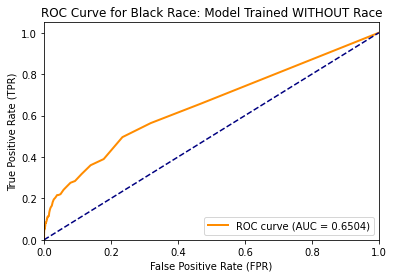

AUC White:  0.7023534715820114
95% Confidence Interval for AUC: [0.6840, 0.7207]


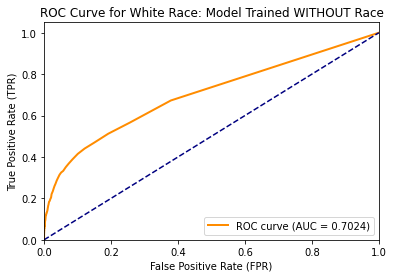

AUC Asian:  0.6830822247154993
95% Confidence Interval for AUC: [0.6021, 0.7616]


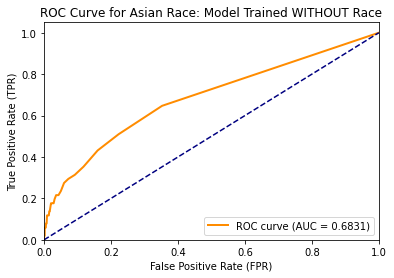

AUC Unknown:  0.63507051750295
95% Confidence Interval for AUC: [0.5827, 0.6815]


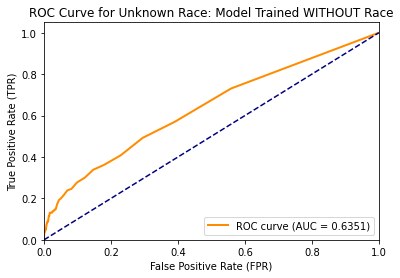

AUC Other:  0.6929033789911682
95% Confidence Interval for AUC: [0.6459, 0.7421]


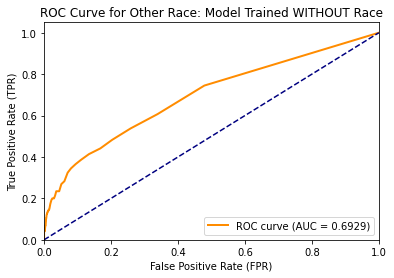

In [166]:
auc_black = calc_roc_auc('Black')
auc_white = calc_roc_auc('White')
auc_asian = calc_roc_auc('Asian')
auc_unk = calc_roc_auc('Unknown')
auc_other = calc_roc_auc('Other')